In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
file_path = "../Data/MachineLearningRating_v3.txt"

data = pd.read_csv(file_path, sep='|', low_memory=False)

In [3]:
#  features and the target variable
features = ['TransactionMonth', 'IsVATRegistered', 'LegalType', 'Country', 'VehicleType']
target_variable = 'TotalClaims'

# Calculating the KPI
kpi = data.groupby(features)[target_variable].mean()

# Choose the KPI with the highest impact
chosen_kpi = kpi.idxmax()


ValueError: The number of FixedLocator locations (318), usually from a call to set_ticks, does not match the number of labels (5).

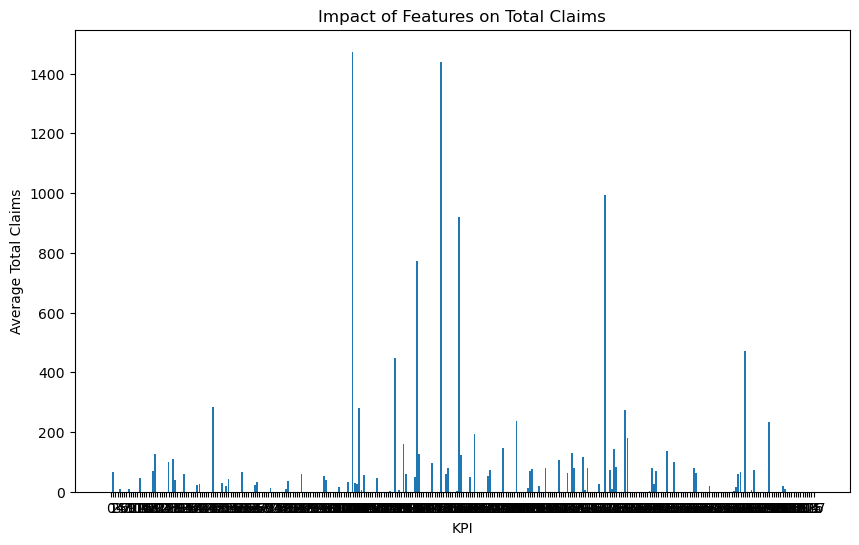

In [6]:
# Check if the target variable exists in the CSV file
if target_variable not in data.columns:
    print("Error: Target variable", target_variable, "does not exist in the CSV file.")
else:
    # Calculate the KPI
    kpi = data.groupby(features)[target_variable].mean().reset_index()

    # Choose the KPI with the highest impact
    chosen_kpi = kpi.loc[kpi[target_variable].idxmax()]

    # Plot the KPI
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(kpi)), kpi[target_variable])
    plt.xlabel('KPI')
    plt.ylabel('Average Total Claims')
    plt.title('Impact of Features on Total Claims')
    plt.xticks(range(len(kpi)), kpi[features].astype(str), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:

# Print the chosen KPI
print("The chosen KPI with the highest impact is:", chosen_kpi)

In [7]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')